# Day 2 - Practical ✍
## Advanced ML Workshop
---
## Resale Housing Dataset
Welcome to the second practical session of SPAI's Advanced Machine Learning Workshop. In this practical, you will experience evaluating the performance the model through cross validation and gain better intuition of bias and variance problem faced by a model. The goal of this dataset is to predict the resale housing price based on the housing features.

# ⚙ *Basic Initialization*
Please do not make any changes to this section.   
This section is required for the demo to work and not running it would result in errors 🚨.   
However, if you would like to understand the code, feel free to do so 😊

### Import Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Sklearn Functions
# Data Partition
from sklearn.model_selection import train_test_split
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
# Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

> ⚠ Please first ensure that yellowbrick has been installed. If not, run the following command:   

```bash
!pip install yellowbrick --upgrade
```

In [ ]:
!pip install yellowbrick --upgrade

### Import Data

In [ ]:
# Init data 🏠
house_df = pd.read_csv('https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/HousingDataset.csv')
house_df = house_df.drop(columns=['Flat Model', 'Block', 'Full Address', 'Lease Commencement Date', 'Remaining Lease Duration', 'Street Name', 'Month of Resale'])

### Data Preprocessing

In [ ]:
# Removes null data as there are very few rows of null data
house_df = house_df.dropna()

### Data Splitting

In [ ]:
X, y = house_df.drop(columns=['Resale Price']), house_df['Resale Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 24)

### Modelling Utilities
The following function returns a `Pipeline` instance that contains the `ColumnTransformer` for preprocessing steps and a customizable estimator.

Creating a function which returns a pipeline with the entire preprocessing steps could be helpful for you to reduce several lines of code.

Example:
``` python 
from sklearn.linear_model import LogisticRegression # Import logistic regression
logex_pipe = custom_pipeline(LogisticRegression()) # Define the model with custom pipeline
logex_pipe.fit(X_train, y_train) # Train model
```

In [ ]:
# Use of function allows us to parse ANY model through the pipeline
def custom_pipeline(model):
    return Pipeline(steps=[
        ('encoder', ColumnTransformer([
                    ('onehot', OneHotEncoder(drop='first', sparse=False), ['Flat Type', 'Storey Range', 'Town'])
                ], remainder='passthrough')
        ), 
        ('model', model)
    ])

---

# Exercise 1️⃣
# Cross Validation
In this exercise, you will learn how to apply cross validation, and get the results out of it.

#### Task
1. Import the `cross_validate` library from model_selection
2. Apply cross validation with the `cross_validate` function you just imported and save the result in the variable `lr_results`. In the `cross_validate` function, parse the following parameters:
    - The Linear Regression model (the Linear Regression model has already been defined as the variable `lr`)
    - `X_train` and `y_train`
    - `scoring` set to `scoring_metrics` list (already defined)
    - `n_jobs` set to `-1`

In [ ]:
from sklearn.linear_model import LinearRegression
lr = custom_pipeline(LinearRegression())

scoring_metrics = ['neg_root_mean_squared_error', 'r2']


### Write your code here ###
# import the cross_validate library from model_selection in sklearn library
from sklearn.______ import ______

# Apply cross validation with k=5 using the 'lr' model, scoring set to 'scoring_metrics' variable 
# Provided and initialize it to lr_results.
lr_results = ______(______, ______, ______, scoring=______, n_jobs=______)

### End ###

# Prints result
print(lr_results)

{'fit_time': array([0.99649477, 1.00326538, 0.92081738, 0.87209392, 0.49279404]), 'score_time': array([0.07644844, 0.06274652, 0.04521728, 0.04672551, 0.02959824]), 'test_neg_root_mean_squared_error': array([-65658.70121082, -65131.04246448, -65350.2868511 , -65359.72012704,
       -65823.72153353]), 'test_r2': array([0.7781292 , 0.78078019, 0.77516699, 0.7791109 , 0.77635292])}


#### Task
1. Find the average RMSE and save it as variable `lr_rmse`. 
    - Use the key `test_neg_root_mean_squared_error` to extract the array from `lr_results`
    - Use `np.mean(<list>)` to find the average of a list
2. Find the average r2 and save it as variable `lr_r2`.
    - Use the key `test_r2` to extract the array from `lr_results`
    - Use `np.mean(<list>)` to find the average of a list

In [ ]:
'''
HINT:
lr_results is a Python Dictionary

sample_dictionary = {
    'key1':'value1',
    'key2':'value2'
}

To access the value in a dictionary you need to call it by its key:
sample_dictionary['key1'] => 'value1'
'''

### Write your code here ###
# Find out the average of the root mean squared error (RMSE) and r2 score from lr_results
lr_rmse = np.______(______['______'])
lr_r2 = np.______(______['______'])

### End ###

# Prints result
print('Model for Decision Tree')
print('RMSE is', lr_rmse)
print('R2 score is', lr_r2)

Model for Decision Tree
RMSE is -65464.694437393264
R2 score is 0.7779080411920675


#### Task
Based off the previous two cells, try applying cross validation using the Decision Tree model instead. Feel free to refer to the steps in the previous cells as the solution are similar.

In [ ]:
'''
Hint:
1. Apply cross validation with decision tree regressor [Stored in dtr] and save the result in dtr_results
2. Find the average RMSE and save the result in dtr_rmse
3. Find the average r2 and save the result in dtr_r2
'''
from sklearn.tree import DecisionTreeRegressor
dtr = custom_pipeline(DecisionTreeRegressor())


### Write your code here ###
# Apply cross validate with k=5 using the 'dtr' model this time, scoring set to 'scoring_metrics' variable
# Provided and initialize it to dtr_results.
dtr_results =  ______(______, ______, ______, scoring=______, n_jobs=______)

# Print out the average of the root mean sqaured error (RMSE) and r2 score from dtr_results
dtr_rmse = np.______(______['______'])
dtr_r2 = np.______(______['______'])
### End ###

# Prints result
print('Model for Decision Tree')
print('RMSE is', dtr_rmse)
print('R2 score is', dtr_r2)

Model for Decision Tree
RMSE is -49601.1397875726
R2 score is 0.8725001531072039


---

# Exercise 2️⃣
# Model Learning Curve
In this exercise you will learn how to plot a model's learning curve.

#### Task
1. Import the `LearningCurve` function under `model_selection` from `yellowbrick`
2. Set the variable `viz` to the `LearningCurve` functin you just imported and parse the following
    - the model `dtr`
    - `cv=5` and `scoring=neg_root_mean_squared_error`
    - `n_jobs=-1` for faster training times
3. Apply the `.fit` method on the `viz` variable, and parse `X_train` and `y_train` in the `.fit` method
4. Answer the following: 
    - Is this model overfitting, underfitting or it has a good fit

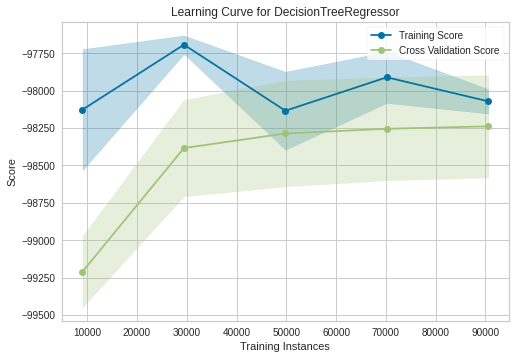

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
X_new = X.drop(columns=['Flat Type', 'Storey Range', 'Town'])
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

### Write your code here ###
# from the yellowbrick library under model_selection, import LearningCurve
from yellowbrick.______ import ______

# initialize LearningCurve to the variable viz
# Parse in the 'dtr' model, with 5 folds cross validation, scoring of 'neg_root_mean_squared_error'
# 💡 Tip: Set n_jobs=-1 for faster results
viz = ______(______, cv=______, scoring=______, n_jobs=______)

# Fit viz to the target and feature variables
viz.fit(______, ______)

# Display viz
viz.show()

### End ###


# 🙋‍♂️🙋‍♀️ Follow Up Question:
# > Is this model Overfitting, Underfitting or Good fit
# Answer: _________

# Conclusion
Congratulations! You have completed Practical Notebook for Day 2 of SPAI Advanced Machine Learning Workshop.  If you have any doubts or require any clarification feel free to approach us through our [Instagram](https://www.instagram.com/spai.sp/) or [Discord Server](https://discord.gg/zPYJMGfQFa)*(remember to verified yourself)*.

Do remember to fill up the Sign Out form and have a good rest. C'ya!

---
> ### Feel Free to Join the Subsequent **SPAI Machine Learning Competition** to earn **valuable Prize💰 and Experience🏆** if you have not done so!🥳🥳
[ML Comp Sign Up Link](https://docs.google.com/forms/d/e/1FAIpQLSchLDXDAY0LqM6fuRDyQwdRNbVT4FYrgDtqthEIfYpFvpWMAg/viewform) *(If it has not been closed)*